# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [129]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
# Create two new dataframes
north_df=pd.read_csv("NorthCallCenter.csv")
south_df=pd.read_csv("SouthCallCenter.csv")
north_df


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


In [130]:
south_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

# EDA Question 1A:  How many reps are in the North branch?  

In [131]:
#Code Used:
north_df["Rep ID"].value_counts()
north_df.nunique( )

Unnamed: 0               245
Branch                     1
Call Purpose               3
Time Block                 9
Incoming or Outgoing       2
Queue                      2
Rep ID                     9
Sale                       3
Lost Call                  2
Abandoned                  2
Busy Minutes               5
Not Ready Minutes          3
Incoming Wait Time         5
During Call Wait Time      3
Calls                      1
dtype: int64

#### EDA Question 1B:  How many reps are in the South branch?  

In [132]:
#Code Used:
south_df.nunique( )

Unnamed: 0               314
Branch                     1
Call Purpose               3
Time Block                 9
Incoming or Outgoing       2
Queue                      2
Rep ID                    11
Sale                       2
Lost Call                  2
Abandoned                  2
Busy Minutes               5
Not Ready Minutes          3
Incoming Wait Time         5
During Call Wait Time      3
Calls                      1
dtype: int64

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [133]:
#Code Used:
north_df.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,122.000000,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,70.869599,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,61.000000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,122.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,183.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,244.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch?  

In [134]:
#Code Used:
south_df.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,156.500000,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,90.788215,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,78.250000,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,156.500000,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,234.750000,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [135]:
# Code Used:
number_of_calls = north_df.value_counts('Time Block')+ south_df.value_counts('Time Block')
number_of_calls

Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
dtype: int64

##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: Incoming wait time has about 60-67 percent missing in each database. If you compare this to the number of outgoing calls - it is the same precentage.  So it is correct for the data to be missing.

In [136]:
# Code Used
# Add Additional Cells as needed.
for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 67%
During Call Wait Time - 0%
Calls - 0%


In [137]:
for col in south_df.columns:
    pct_missing = np.mean(south_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 60%
During Call Wait Time - 0%
Calls - 0%


In [138]:
north_df["Incoming or Outgoing"].value_counts()

Outgoing    163
Incoming     82
Name: Incoming or Outgoing, dtype: int64

In [139]:
south_df["Incoming or Outgoing"].value_counts()

Outgoing    188
Incoming    126
Name: Incoming or Outgoing, dtype: int64

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: There was an extra space at the end of one of the "Yes" enteries.  So I used strip to remove the extra space.

In [140]:
#Code Used
# Add Additional Cells as needed.
north_df['Sale'].value_counts()

NO      234
YES      10
YES       1
Name: Sale, dtype: int64

In [141]:
north_df['Sale']=north_df['Sale'].str.strip()


In [142]:
north_df['Sale'].value_counts()

NO     234
YES     11
Name: Sale, dtype: int64

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: There are no duplicate rows in either data set.

In [143]:
#Code Used
# Add Additional Cells as needed.
north_df.duplicated().describe()

count       245
unique        1
top       False
freq        245
dtype: object

In [144]:
south_df.duplicated().describe()

count       314
unique        1
top       False
freq        314
dtype: object

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: Not much is extra for this data - I have removed the "Unnamed" column since it is just numbering them.

In [146]:
#Code Used
# Add Additional Cells as needed.
north_df=north_df.drop(["Unnamed: 0"], axis=1)
north_df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


In [148]:
south_df=south_df.drop(["Unnamed: 0"], axis=1)
south_df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [149]:
# Create dataframe for the entire company named df

df = pd.concat([north_df, south_df])
df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent 37
- South Branch = Eric 35


In [150]:
# Code Used
# Add Additional Cells as needed.
df.groupby(['Branch','Rep ID'])['Calls'].sum()
#.sort_values(by="calls",ascending=false)

Branch  Rep ID
North   Amanda    23
        Andy      23
        Brent     37
        Cam       24
        Duke      29
        Joe       26
        Lilly     30
        Todd      29
        Xander    24
South   Alice     20
        Eric      35
        George    29
        Helga     31
        Josh      26
        Karl      28
        Kate      29
        Randy     33
        Sandy     32
        Sharon    25
        Susan     26
Name: Calls, dtype: int64

In [151]:
df.groupby(['Branch','Rep ID']).describe()

Lost Call                                               \
                  count      mean       std  min  25%  50%  75%  max   
Branch Rep ID                                                          
North  Amanda      23.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
       Andy        23.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
       Brent       37.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
       Cam         24.0  0.041667  0.204124  0.0  0.0  0.0  0.0  1.0   
       Duke        29.0  0.068966  0.257881  0.0  0.0  0.0  0.0  1.0   
       Joe         26.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
       Lilly       30.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
       Todd        29.0  0.034483  0.185695  0.0  0.0  0.0  0.0  1.0   
       Xander      24.0  0.041667  0.204124  0.0  0.0  0.0  0.0  1.0   
South  Alice       20.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
       Eric        35.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
       George      29.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
       Helga       31.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
       Josh        26.0  0.115385  0.325813  0.0  0.0  0.0  0.0  1.0   
       Karl        28.0  0.035714  0.188982  0.0  0.0  0.0  0.0  1.0   
       Kate        29.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
       Randy       33.0  0.090909  0.291937  0.0  0.0  0.0  0.0  1.0   
       Sandy       32.0  0.031250  0.176777  0.0  0.0  0.0  0.0  1.0   
       Sharon      25.0  0.040000  0.200000  0.0  0.0  0.0  0.0  1.0   
       Susan       26.0  0.076923  0.271746  0.0  0.0  0.0  0.0  1.0   

              Abandoned            ... During Call Wait Time      Calls       \
                  count      mean  ...                   75%  max count mean   
Branch Rep ID                      ...                                         
North  Amanda      23.0  0.043478  ...                  3.00  4.0  23.0  1.0   
       Andy        23.0  0.130435  ...                  3.50  4.0  23.0  1.0   
       Brent       37.0  0.027027  ...                  4.00  4.0  37.0  1.0   
       Cam         24.0  0.000000  ...                  3.25  4.0  24.0  1.0   
       Duke        29.0  0.000000  ...                  4.00  4.0  29.0  1.0   
       Joe         26.0  0.000000  ...                  4.00  4.0  26.0  1.0   
       Lilly       30.0  0.066667  ...                  4.00  4.0  30.0  1.0   
       Todd        29.0  0.000000  ...                  4.00  4.0  29.0  1.0   
       Xander      24.0  0.000000  ...                  4.00  4.0  24.0  1.0   
South  Alice       20.0  0.000000  ...                  3.25  4.0  20.0  1.0   
       Eric        35.0  0.000000  ...                  4.00  4.0  35.0  1.0   
       George      29.0  0.000000  ...                  4.00  4.0  29.0  1.0   
       Helga       31.0  0.064516  ...                  4.00  4.0  31.0  1.0   
       Josh        26.0  0.000000  ...                  4.00  4.0  26.0  1.0   
       Karl        28.0  0.000000  ...                  4.00  4.0  28.0  1.0   
       Kate        29.0  0.000000  ...                  3.00  4.0  29.0  1.0   
       Randy       33.0  0.030303  ...                  4.00  4.0  33.0  1.0   
       Sandy       32.0  0.000000  ...                  4.00  4.0  32.0  1.0   
       Sharon      25.0  0.040000  ...                  4.00  4.0  25.0  1.0   
       Susan       26.0  0.000000  ...                  4.00  4.0  26.0  1.0   

                                             
               std  min  25%  50%  75%  max  
Branch Rep ID                                
North  Amanda  0.0  1.0  1.0  1.0  1.0  1.0  
       Andy    0.0  1.0  1.0  1.0  1.0  1.0  
       Brent   0.0  1.0  1.0  1.0  1.0  1.0  
       Cam     0.0  1.0  1.0  1.0  1.0  1.0  
       Duke    0.0  1.0  1.0  1.0  1.0  1.0  
       Joe     0.0  1.0  1.0  1.0  1.0  1.0  
       Lilly   0.0  1.0  1.0  1.0  1.0  1.0  
       Todd    0.0  1.0  1.0  1.0  1.0  1.0  
       Xan

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86
- South Branch = 1.27
- Company Wide =1.97
- Do any of these fall out of the optimal range of 2-5%? no

In [152]:
# Code Used
# Add Additional Cells as needed.
branch_gp=df.groupby(['Branch'])
agg_func_list = ['sum', 'mean']
branch_gp.agg(agg_func_list)

C:\Users\Krmt2\AppData\Local\Temp\ipykernel_71444\1237851318.py:5: FutureWarning: ['Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  branch_gp.agg(agg_func_list)


Lost Call           Abandoned           Busy Minutes             \
             sum      mean       sum      mean          sum       mean   
Branch                                                                   
North          5  0.020408         7  0.028571         2447   9.987755   
South         11  0.035032         4  0.012739         3157  10.054140   

       Not Ready Minutes           Incoming Wait Time           \
                     sum      mean                sum     mean   
Branch                                                           
North                469  1.914286              250.0  3.04878   
South                600  1.910828              378.0  3.00000   

       During Call Wait Time           Calls       
                         sum      mean   sum mean  
Branch                                             
North                    727  2.967347   245  1.0  
South                    966  3.076433   314  1.0

In [153]:
mean_df=df.groupby(["Branch"]).mean()
percentage=round(mean_df['Abandoned']*100,2)
percentage

C:\Users\Krmt2\AppData\Local\Temp\ipykernel_71444\3025939988.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df=df.groupby(["Branch"]).mean()


Branch
North    2.86
South    1.27
Name: Abandoned, dtype: float64

In [154]:
whole=df.mean()
w_percent=round(whole['Abandoned']*100,2)
w_percent


C:\Users\Krmt2\AppData\Local\Temp\ipykernel_71444\2261533326.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  whole=df.mean()


1.97

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 98.78
- South Branch = 64.28
- Company Wide = 38.94

In [203]:
# Code Used
# Add Additional Cells as needed.
speedy= 0
for iwt in df['Incoming Wait Time']:

    if iwt <= 2:
        speedy +=1
    
cwide= speedy/df['Incoming Wait Time'].count()
nside= speedy/north_df['Incoming Wait Time'].count()
sside= speedy/(south_df['Incoming Wait Time'].count())
print("cw =",cwide)
print("N =",nside)
print("S =",sside)


cw = 0.3894230769230769
N = 0.9878048780487805
S = 0.6428571428571429


In [156]:
df["Incoming Wait Time"].describe()

count    208.000000
mean       3.019231
std        1.365417
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Incoming Wait Time, dtype: float64

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.0
- Company Wide in seconds = 3.02


In [183]:
# Code Used 
south_wait_sum=south_df['Incoming Wait Time'].sum()
south_avg_speed=round(south_wait_sum/south_df['Incoming Wait Time'].count(),2)
south_avg_speed

3.0

In [184]:
north_wait_sum=north_df['Incoming Wait Time'].sum()
north_avg_speed=round(north_wait_sum/north_df['Incoming Wait Time'].count(),2)
north_avg_speed

3.05

In [185]:
all_wait_sum=df['Incoming Wait Time'].sum()
all_avg_speed=round(all_wait_sum/df['Incoming Wait Time'].count(),2)
all_avg_speed

3.02

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I went with a bar chart.  I thought it was simple and clear way to show the abandonment rate per queue.

C:\Users\Krmt2\AppData\Local\Temp\ipykernel_71444\3878814700.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  queue_dict = df.groupby("Queue").agg("sum")


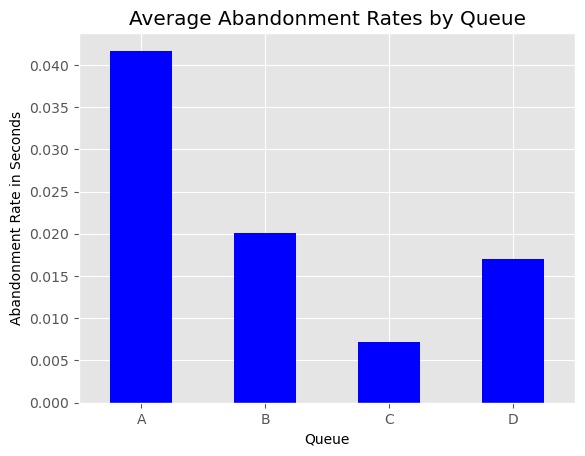

In [187]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your Code Here:
abandonment_df = pd.DataFrame.from_dict(abandonment_rates, orient='index', columns=['Abandonment Rate'])

abandonment_df.plot(kind='bar', color=['blue'], legend=False)
plt.title('Average Abandonment Rates by Queue')
plt.xlabel('Queue')
plt.ylabel('Abandonment Rate')
plt.xticks(rotation=0)
plt.savefig('abandonratequeue.png')
plt.show()


In [186]:
 abandonment_rates

{'A': 0.041666666666666664,
 'B': 0.020134228187919462,
 'C': 0.007246376811594203,
 'D': 0.017045454545454544}

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: I went with a bar chart to show the avg speed of answer with a line chart overlay for the service level percentage. I wanted to show them on the same graph and I enjoy the vizual difference.

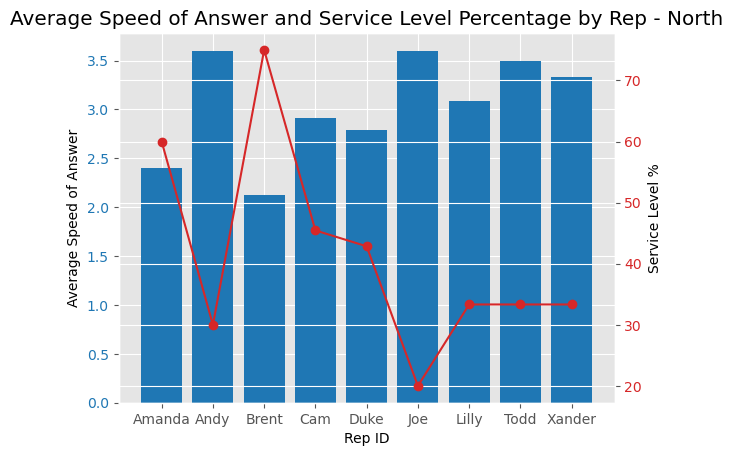

,Calls_x,Calls_y,Service Level %
Rep ID,,,
Amanda,3,5,60.000000
Andy,3,10,30.000000
Brent,6,8,75.000000
Cam,5,11,45.454545
Duke,6,14,42.857143
Joe,2,10,20.000000
Lilly,4,12,33.333333
Todd,2,6,33.333333
Xander,2,6,33.333333


In [204]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
# Combine dataframes to create a visualization dataframe
merged_df = pd.merge(north_plt, service_level, on="Rep ID")

# Create the visualization
fig, ax1 = plt.subplots()

# Plot average speed of answer
color = 'tab:blue'
ax1.set_xlabel('Rep ID')
ax1.set_ylabel('Average Speed of Answer', color='black')
ax1.bar(merged_df['Rep ID'], merged_df['Incoming Wait Time'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

#secondary y-axis for service level percentage
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Service Level %', color='black')
ax2.plot(merged_df['Rep ID'], merged_df['Service Level %'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Average Speed of Answer and Service Level Percentage by Rep - North')
plt.savefig('avgspeedrepnorth.png')
plt.show()
service_level

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:
Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75

> Chart style you chose and why: I thought it may have been two busy on one graph - so I split them out.  I enjoy how all of the incoming are the same color so its easy to follow.  And really helps to show complaints are only incoming.

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


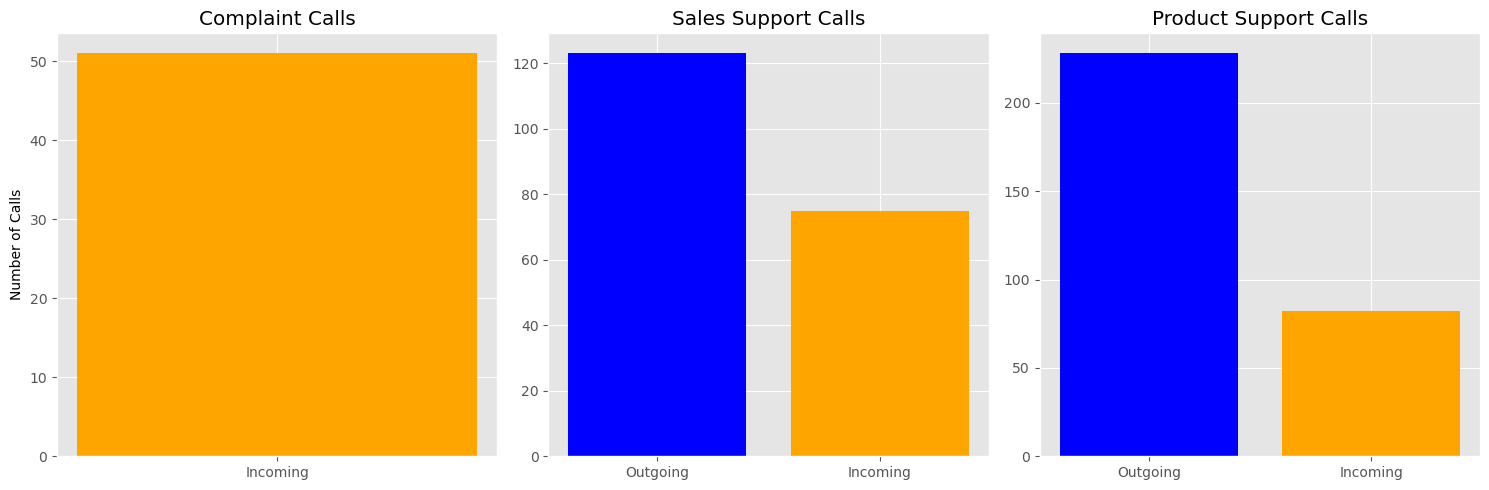

In [206]:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need
purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# Complaints
axes[0].bar(complaints.keys(), complaints.values(), color=['orange', 'blue'])
axes[0].set_title('Complaint Calls')
axes[0].set_ylabel('Number of Calls')

# Sales Support
axes[1].bar(sales_support.keys(), sales_support.values(), color=['blue', 'orange'])
axes[1].set_title('Sales Support Calls')

# Product Support
axes[2].bar(product_support.keys(), product_support.values(), color=['blue', 'orange'])
axes[2].set_title('Product Support Calls')
plt.tight_layout()
plt.savefig('outvsincalls.png')
plt.show()

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: I think these branches are very close.  I do feel that based on a slightly better average speeds of answer and much better abandonment rate the South seems to be the more efficient branch.  



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: I would probably recommend adding at least another rep to the North branch to help them combat their call abandonment issues.  I would say though that South is getting more calls so I would spread my resources to both teams if possible.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: I would love to get more data on abandoned calls.  I am wondering when in the process the clients are giving up - is it when they are on hold or when the rep goes to retrieve information for them.  And what techniques are the reps using to not lose these calls.


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: